In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
data = pd.read_csv("C:/Users/39dee/Downloads/EV_Charging_Station_Usage.csv")
df = pd.DataFrame(data)

In [143]:
df.describe()

,Energy_Consumed_kWh,Cost_INR
count,500.000000,500.00000
mean,52.680400,526.80400
std,27.589008,275.89008
min,3.200000,32.00000
25%,28.650000,286.50000
50%,51.600000,516.00000
75%,76.225000,762.25000
max,99.900000,999.00000


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Station_ID           500 non-null    object 
 1   City                 500 non-null    object 
 2   Date                 500 non-null    object 
 3   Vehicle_Type         500 non-null    object 
 4   Charging_Start_Time  500 non-null    object 
 5   Charging_End_Time    500 non-null    object 
 6   Energy_Consumed_kWh  500 non-null    float64
 7   Cost_INR             500 non-null    float64
 8   Payment_Method       500 non-null    object 
dtypes: float64(2), object(7)
memory usage: 35.3+ KB


In [145]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Station_ID           500 non-null    object        
 1   City                 500 non-null    object        
 2   Date                 500 non-null    datetime64[ns]
 3   Vehicle_Type         500 non-null    object        
 4   Charging_Start_Time  500 non-null    object        
 5   Charging_End_Time    500 non-null    object        
 6   Energy_Consumed_kWh  500 non-null    float64       
 7   Cost_INR             500 non-null    float64       
 8   Payment_Method       500 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 35.3+ KB


In [146]:
df["Charging_Start_Time"] = pd.to_datetime(df["Charging_Start_Time"], format="%H:%M", errors="coerce")

In [147]:
df["Charging_End_Time"] = pd.to_datetime(df["Charging_End_Time"], format="%H:%M", errors="coerce")

In [148]:
df["Charging_Time"] = (df["Charging_End_Time"] - df["Charging_Start_Time"])
print(df)

    Station_ID       City       Date Vehicle_Type Charging_Start_Time  \
0        ST001    Kolkata 2025-10-15          Car 1900-01-01 12:14:00   
1        ST002       Pune 2025-10-15          Bus 1900-01-01 15:27:00   
2        ST003  Hyderabad 2025-10-15          Car 1900-01-01 11:29:00   
3        ST004     Indore 2025-10-15          Bus 1900-01-01 10:12:00   
4        ST005     Indore 2025-10-15          Car 1900-01-01 10:19:00   
..         ...        ...        ...          ...                 ...   
495      ST496     Indore 2025-10-15          Bus 1900-01-01 16:39:00   
496      ST497  Ahmedabad 2025-10-15          Car 1900-01-01 10:21:00   
497      ST498      Delhi 2025-10-15        Truck 1900-01-01 16:55:00   
498      ST499     Bhopal 2025-10-15        Truck 1900-01-01 12:59:00   
499      ST500     Bhopal 2025-10-15         Bike 1900-01-01 11:34:00   

      Charging_End_Time  Energy_Consumed_kWh  Cost_INR Payment_Method  \
0   1900-01-01 13:57:00                 96.2     9

In [149]:
df["Duration"] = (
    df["Charging_Time"]
    .astype(str)
    .str.replace("0 days ", "", regex=False)
)
print(df)

    Station_ID       City       Date Vehicle_Type Charging_Start_Time  \
0        ST001    Kolkata 2025-10-15          Car 1900-01-01 12:14:00   
1        ST002       Pune 2025-10-15          Bus 1900-01-01 15:27:00   
2        ST003  Hyderabad 2025-10-15          Car 1900-01-01 11:29:00   
3        ST004     Indore 2025-10-15          Bus 1900-01-01 10:12:00   
4        ST005     Indore 2025-10-15          Car 1900-01-01 10:19:00   
..         ...        ...        ...          ...                 ...   
495      ST496     Indore 2025-10-15          Bus 1900-01-01 16:39:00   
496      ST497  Ahmedabad 2025-10-15          Car 1900-01-01 10:21:00   
497      ST498      Delhi 2025-10-15        Truck 1900-01-01 16:55:00   
498      ST499     Bhopal 2025-10-15        Truck 1900-01-01 12:59:00   
499      ST500     Bhopal 2025-10-15         Bike 1900-01-01 11:34:00   

      Charging_End_Time  Energy_Consumed_kWh  Cost_INR Payment_Method  \
0   1900-01-01 13:57:00                 96.2     9

In [150]:
df["Duration"] = pd.to_datetime(df["Duration"], format="%H:%M:%S")

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Station_ID           500 non-null    object         
 1   City                 500 non-null    object         
 2   Date                 500 non-null    datetime64[ns] 
 3   Vehicle_Type         500 non-null    object         
 4   Charging_Start_Time  500 non-null    datetime64[ns] 
 5   Charging_End_Time    500 non-null    datetime64[ns] 
 6   Energy_Consumed_kWh  500 non-null    float64        
 7   Cost_INR             500 non-null    float64        
 8   Payment_Method       500 non-null    object         
 9   Charging_Time        500 non-null    timedelta64[ns]
 10  Duration             500 non-null    datetime64[ns] 
dtypes: datetime64[ns](4), float64(2), object(4), timedelta64[ns](1)
memory usage: 43.1+ KB


In [152]:
payment = df[["Payment_Method"]].value_counts()
print(payment)

Payment_Method
Cash              169
UPI               168
Card              163
Name: count, dtype: int64


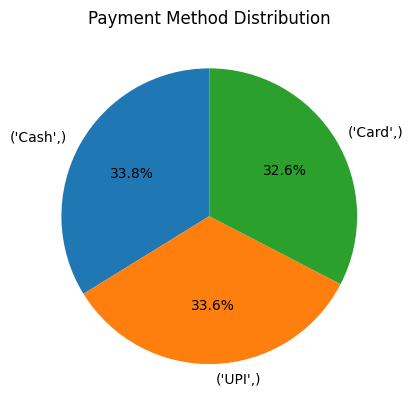

In [157]:
plt.pie(payment, labels = payment.index , autopct='%1.1f%%', startangle = 90)
plt.title("Payment Method Distribution")
plt.show()

In [165]:
city = df["City"].value_counts()
print(city)

City
Delhi        58
Jaipur       58
Ahmedabad    58
Bhopal       52
Kolkata      50
Pune         48
Indore       48
Hyderabad    43
Chennai      43
Mumbai       42
Name: count, dtype: int64


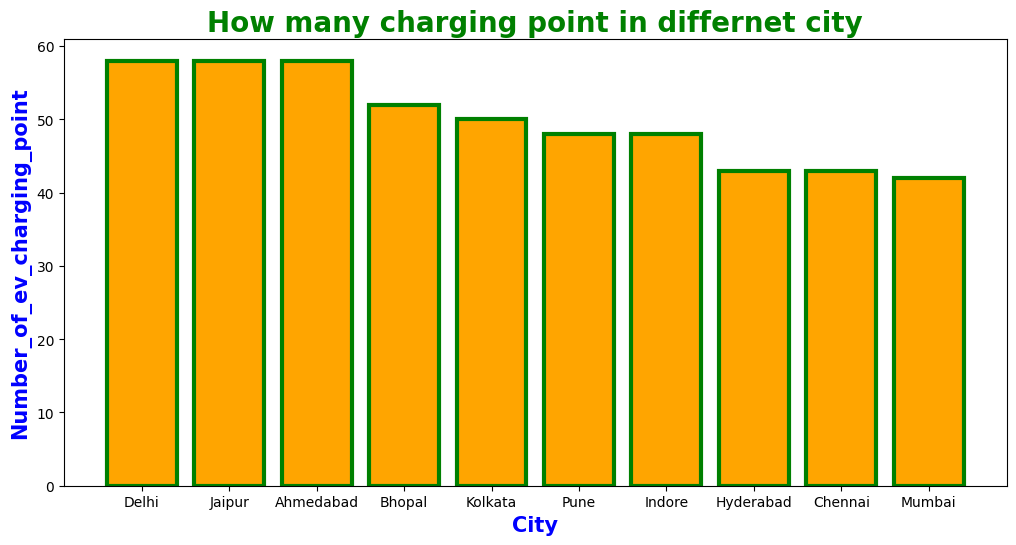

In [188]:
plt.figure(figsize=(10,5))
plt.bar(city.index , city.values, color = "orange",edgecolor="green",linewidth=3)
plt.tight_layout()
plt.xlabel("City",fontweight="bold",fontsize=15,color="blue")
plt.ylabel("Number_of_ev_charging_point",fontweight="bold",fontsize=15,color="blue")
plt.title("How many charging point in differnet city",fontweight="bold",fontsize=20,color="Green")
plt.show()

In [192]:
consumption_sum = df.groupby("City")["Energy_Consumed_kWh"].sum()
print(consumption_sum)

City
Ahmedabad    2764.7
Bhopal       2736.9
Chennai      2145.7
Delhi        3482.7
Hyderabad    2180.2
Indore       2256.1
Jaipur       3076.0
Kolkata      2863.0
Mumbai       2131.9
Pune         2703.0
Name: Energy_Consumed_kWh, dtype: float64


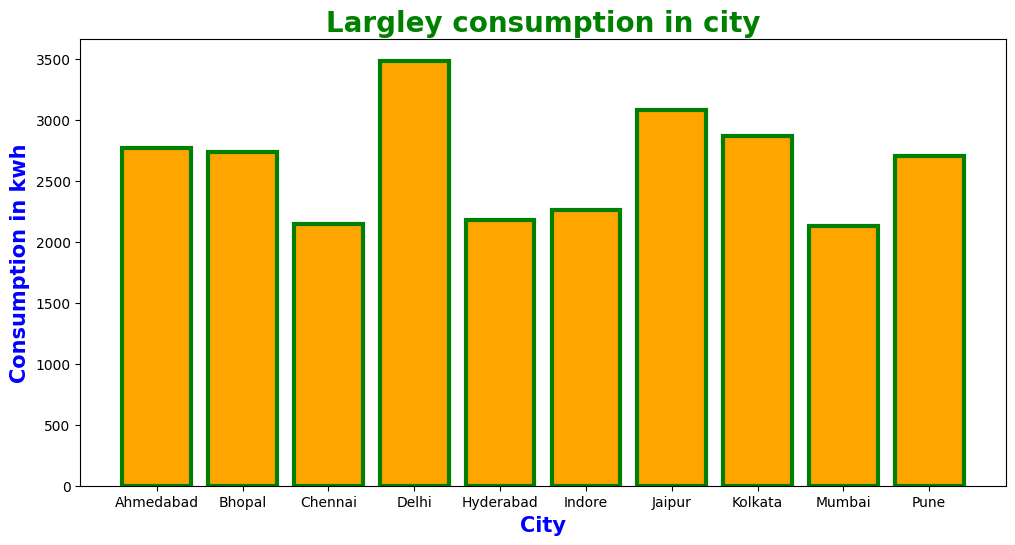

In [193]:
plt.figure(figsize=(10,5))
plt.bar(consumption_sum.index , consumption_sum.values, color = "orange",edgecolor="green",linewidth=3)
plt.tight_layout()
plt.xlabel("City",fontweight="bold",fontsize=15,color="blue")
plt.ylabel("Consumption in kwh",fontweight="bold",fontsize=15,color="blue")
plt.title("Largley consumption in city",fontweight="bold",fontsize=20,color="Green")
plt.show()

In [195]:
# Simple correlation
correlation = df["Cost_INR"].corr(df["Energy_Consumed_kWh"])
print("Cost vs Energy correlation:", correlation)

Cost vs Energy correlation: 1.0


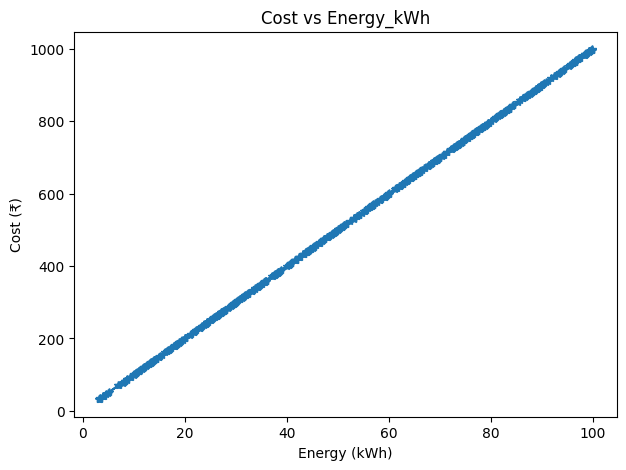

In [213]:
plt.figure(figsize=(7,5))
plt.plot(df["Energy_Consumed_kWh"],df["Cost_INR"],marker="*")
plt.title("Cost vs Energy_kWh")
plt.xlabel("Energy (kWh)")
plt.ylabel("Cost (₹)")
plt.show()